# 可视化训练日志-训练过程总体评估指标

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


--2023-08-19 10:52:35--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.2MB/s    用时 0.5s    

2023-08-19 10:52:36 (21.2 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



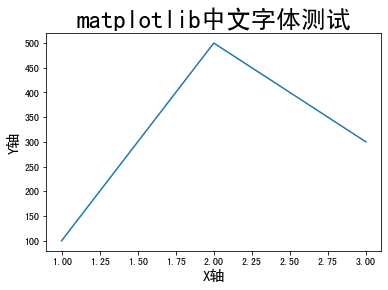

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 进入MMSegmentation主目录

In [3]:
import os
os.chdir('mmsegmentation')

In [4]:
os.getcwd()

'/home/featurize/work/MMSegmentation教程20230625/0816录制视频/mmsegmentation'

## 导入工具包

In [5]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## 载入训练日志

In [6]:
# 日志文件路径
log_path = './work_dirs/ZihaoDataset-PSPNet/20230818_210528/vis_data/scalars.json'

In [7]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [8]:
len(json_list)

481

In [9]:
eval(json_list[4])

{'lr': 0.009911076035273796,
 'data_time': 0.007559657096862793,
 'loss': 0.4991290748119354,
 'decode.loss_ce': 0.34158905446529386,
 'decode.acc_seg': 80.78632354736328,
 'aux.loss_ce': 0.1575400173664093,
 'aux.acc_seg': 74.03707885742188,
 'time': 0.4436677932739258,
 'iter': 400,
 'memory': 6112,
 'step': 400}

In [10]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()
for each in json_list[:-1]:
    if 'aAcc' in each:
        df_test = df_test.append(eval(each), ignore_index=True)
    else:
        df_train = df_train.append(eval(each), ignore_index=True)

In [11]:
df_train

,lr,data_time,loss,decode.loss_ce,decode.acc_seg,aux.loss_ce,aux.acc_seg,time,iter,memory,step
0,0.009998,0.006554,1.783826,1.225174,66.193298,0.558652,69.981575,0.430009,12.0,10471.0,12.0
1,0.009978,0.008720,0.709068,0.508196,84.031769,0.200872,83.150391,0.439457,100.0,6112.0,100.0
2,0.009956,0.008718,0.757486,0.540597,80.645561,0.216889,90.437698,0.443066,200.0,6112.0,200.0
3,0.009933,0.007482,0.540372,0.375773,92.525482,0.164600,92.371658,0.443259,300.0,6112.0,300.0
4,0.009911,0.007560,0.499129,0.341589,80.786324,0.157540,74.037079,0.443668,400.0,6112.0,400.0
...,...,...,...,...,...,...,...,...,...,...,...
396,0.000257,0.008970,0.050959,0.032073,98.997307,0.018886,98.826691,0.448231,39600.0,6112.0,39600.0
397,0.000221,0.007573,0.045055,0.029489,99.259567,0.015566,99.067879,0.444767,39700.0,6112.0,39700.0
398,0.000184,0.007624,0.045155,0.029829,98.760605,0.015326,98.170662,0.445946,39800.0,6112.0,39800.0
399,0.000145,0.007899,0.051715,0.030845,99.236588,0.020870,98.989197,0.444986,39900.0,6112.0,39900.0


In [12]:
df_test

,aAcc,mIoU,mAcc,mDice,mFscore,mPrecision,mRecall,data_time,time,step
0,94.24,66.05,75.24,73.29,87.95,85.92,75.24,0.029233,0.804989,500.0
1,93.72,72.20,84.16,82.51,82.51,82.86,84.16,0.010767,0.141955,1000.0
2,87.17,61.47,76.86,74.99,74.99,76.76,76.86,0.009815,0.141046,1500.0
3,95.49,78.36,85.87,87.11,87.11,89.02,85.87,0.011528,0.142984,2000.0
4,95.23,75.07,83.62,84.38,84.38,88.13,83.62,0.010325,0.141371,2500.0
...,...,...,...,...,...,...,...,...,...,...
74,96.48,81.07,88.31,88.96,88.96,90.41,88.31,0.009075,0.139759,37500.0
75,96.52,80.93,87.49,88.80,88.80,91.23,87.49,0.009882,0.140745,38000.0
76,96.76,80.50,87.23,88.46,88.46,90.80,87.23,0.008504,0.138833,38500.0
77,96.79,80.82,87.31,88.66,88.66,91.33,87.31,0.010099,0.141515,39000.0


## 导出训练日志表格

In [13]:
df_train.to_csv('图表/训练日志-训练集.csv', index=False)
df_test.to_csv('图表/训练日志-测试集.csv', index=False)

## 可视化辅助函数

In [14]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [15]:
metrics = ['loss', 'decode.loss_ce', 'aux.loss_ce']

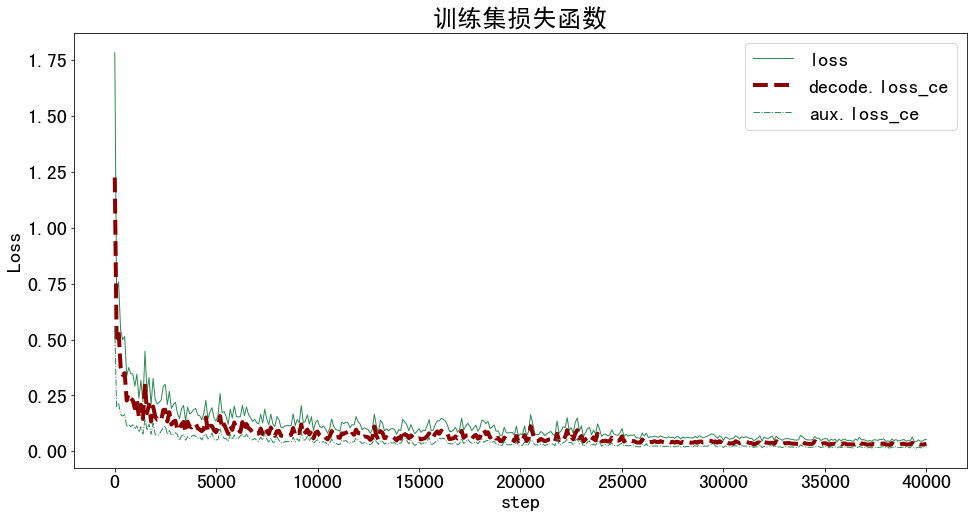

In [16]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 训练集准确率

In [17]:
metrics = ['decode.acc_seg', 'aux.acc_seg']

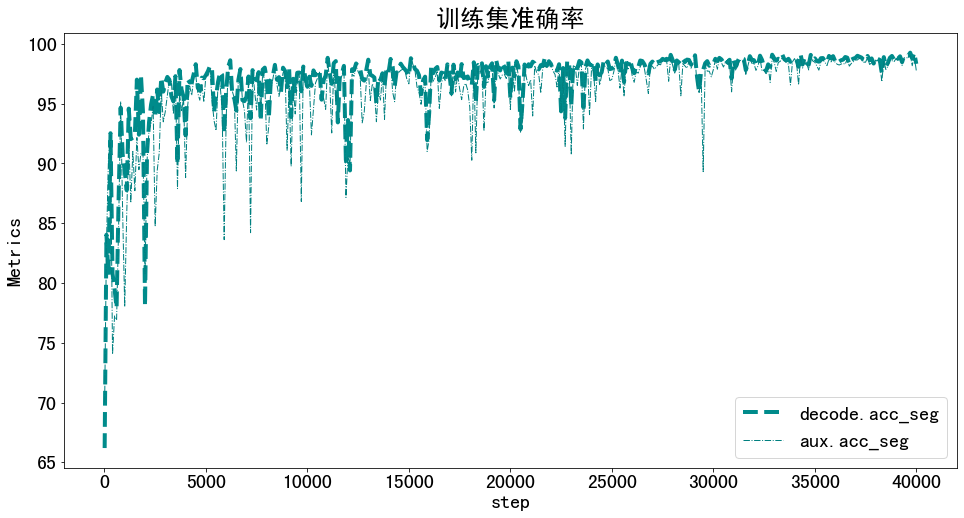

In [18]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    try:
        plt.plot(x, df_train[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('训练集准确率', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

## 测试集评估指标

In [19]:
df_test.columns

Index(['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall',
       'data_time', 'time', 'step'],
      dtype='object')

In [20]:
metrics = ['aAcc', 'mIoU', 'mAcc', 'mDice', 'mFscore', 'mPrecision', 'mRecall']

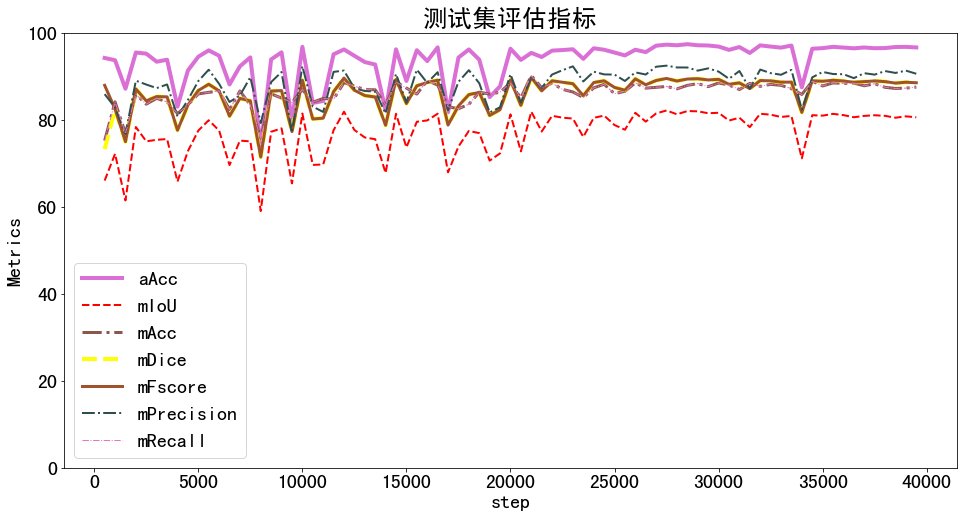

In [21]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    try:
        plt.plot(x, df_test[y], label=y, **get_line_arg())
    except:
        pass

plt.tick_params(labelsize=20)
plt.ylim([0, 100])
plt.xlabel('step', fontsize=20)
plt.ylabel('Metrics', fontsize=20)
plt.title('测试集评估指标', fontsize=25)

plt.legend(fontsize=20)

plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.show()